In [1]:
# import the necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Boston Housing Dataset

## loading the dataset

In [2]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

57026/57026 [==============================] - 0s 1us/step
X_train shape: (404, 13)
y_train shape: (404,)
X_test shape: (102, 13)
y_test shape: (102,)


## quick glance at the target and train set

<AxesSubplot:ylabel='Count'>

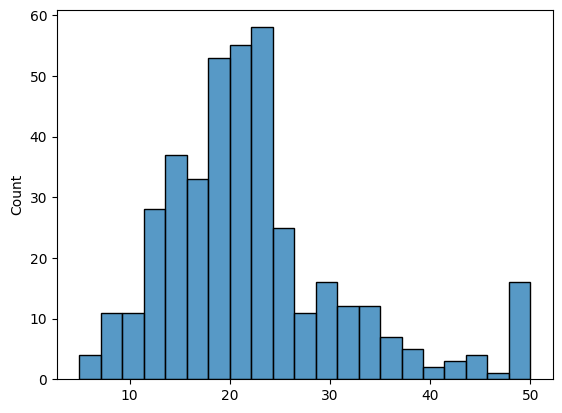

In [3]:
# distribution of house prices in the train set

sns.histplot(y_train)

In [6]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [7]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
pd.DataFrame(X_train).duplicated().sum()

0

In [11]:
pd.DataFrame(X_train).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

__No duplicates or missing values__ -> let's do the bare minimum of data preprocessing, i.e. scaling and move on quickly to the modeling phase.

## minimal data preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## baseline model

In a regression task, the __baseline model__ always predicts the average value of y_train.


In Time Series, the baseline model predicts the __last seen value__.

Before running any Machine Learning algorithm or advanced Deep Learning Neural Networks, it would be great to establish a benchmark score that we are supposed to beat. 


Let's compute the __Mean Absolute Error__ on the testing set using a "dumb" prediction of the mean value of __y_train__, computed on the training set.

In [13]:
y_pred = np.mean(y_train)
print(f'The mean prediction is {round(y_pred, 3)}')

absolute_error_test_baseline = [np.abs(y_true - y_pred) for y_true in y_test]
mean_absolute_error_test_baseline = np.mean(absolute_error_test_baseline)

print(f'The benchmark mean absolute error is {round(mean_absolute_error_test_baseline,3)}')

The mean prediction is 22.395
The benchmark mean absolute error is 6.533


# Neural Network

In [14]:
from tensorflow.keras import models, layers

# define function that generates a Neural network

def initialize_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_dim=X_train.shape[-1]))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    return model

In [15]:
# manual computation of number of parameters

X_train.shape[-1]*10+10 + 10*7+7 + 7*1+1

225

In [16]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


2024-02-16 12:19:47.897329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-16 12:19:47.898401: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-16 12:19:47.898657: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PORT-EMONTEIRO): /proc/driver/nvidia/version does not exist
2024-02-16 12:19:47.903810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# create function to compile the model

def compile_model(model, optimizer_name):
    
    model.compile(
        loss='mse',
        optimizer=optimizer_name,
        metrics=['mae']
    )
    
    return model

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

model = compile_model(initialize_model(), 'adam')

es = EarlyStopping(
    patience = 10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.3,
    shuffle=True,
    batch_size=16,
    epochs=1000,
    callbacks=[es],
    verbose=0
)

res = model.evaluate(X_test_scaled, y_test)[1]
res

4/4 [==============================] - 0s 1ms/step - loss: 23.7963 - mae: 3.1781


3.178138494491577

In [21]:
# neural network vs baseline

print(f'The MAE on the test set is {round(res, 4)} for the Neural Network vs {round(mean_absolute_error_test_baseline,4)} for the baseline')

The MAE on the test set is 3.1781 for the Neural Network vs 6.533 for the baseline


In [ ]:
def plot_loss_mae(history):
    # Setting figures
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

    # Create the plots
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])

    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])

    # Set titles and labels
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')

    # Set limits for y-axes
    ax1.set_ylim(ymin=0, ymax=200)
    ax2.set_ylim(ymin=0, ymax=20)

    # Generate legends
    ax1.legend(['Train', 'Validation'], loc='best')
    ax2.legend(['Train', 'Validation'], loc='best')

    # Show grids
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)

    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)

    plt.show() 